In [97]:
##Import data and its packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
#Checking missing values

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
#Check duplicates

df.duplicated().sum()

0

In [9]:
#Checking unique values

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Exploring the data

In [14]:
print("Categories in 'Gender' variable: ", end = " ")
print(df['gender'].unique())

print("\nCategories in 'Race/ethnicity' variable: ", end = " ")
print(df['race_ethnicity'].unique())

print("\nCategories in 'parental_level_of_education' variable: ", end = " ")
print(df['parental_level_of_education'].unique())

print("\nCategories in 'lunch' variable: ", end = " ")
print(df['lunch'].unique())

print("\nCategories in 'test preparation course' variable: ", end = " ")
print(df['test_preparation_course'].unique())



Categories in 'Gender' variable:  ['female' 'male']

Categories in 'Race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable:  ['standard' 'free/reduced']

Categories in 'test preparation course' variable:  ['none' 'completed']


In [17]:
#Define numerical and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features: ['math_score', 'reading_score', 'writing_score', 'total score', 'average']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


<h3> Adding columns for "Total Score" & "Average" </h3>

In [16]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['average'] = df['total score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [19]:
reading_less_20 = df[df['reading_score'] <=20]['average'].count()
writing_less_20 = df[df['writing_score'] <=20]['average'].count()
math_less_20 = df[df['math_score'] <=20]['average'].count()


print(f'The number of students with less than 20 marks in reading: {reading_less_20}')
print(f'The number of students with less than 20 marks in writing: {writing_less_20}')
print(f'The number of students with less than 20 marks in math: {math_less_20}')

The number of students with less than 20 marks in reading: 1
The number of students with less than 20 marks in writing: 3
The number of students with less than 20 marks in math: 4


<h4> Insights </h4>

Best performance is in the reading section

<h4> Exploring data (visualization) </h4>

<h4> Histograms </h4

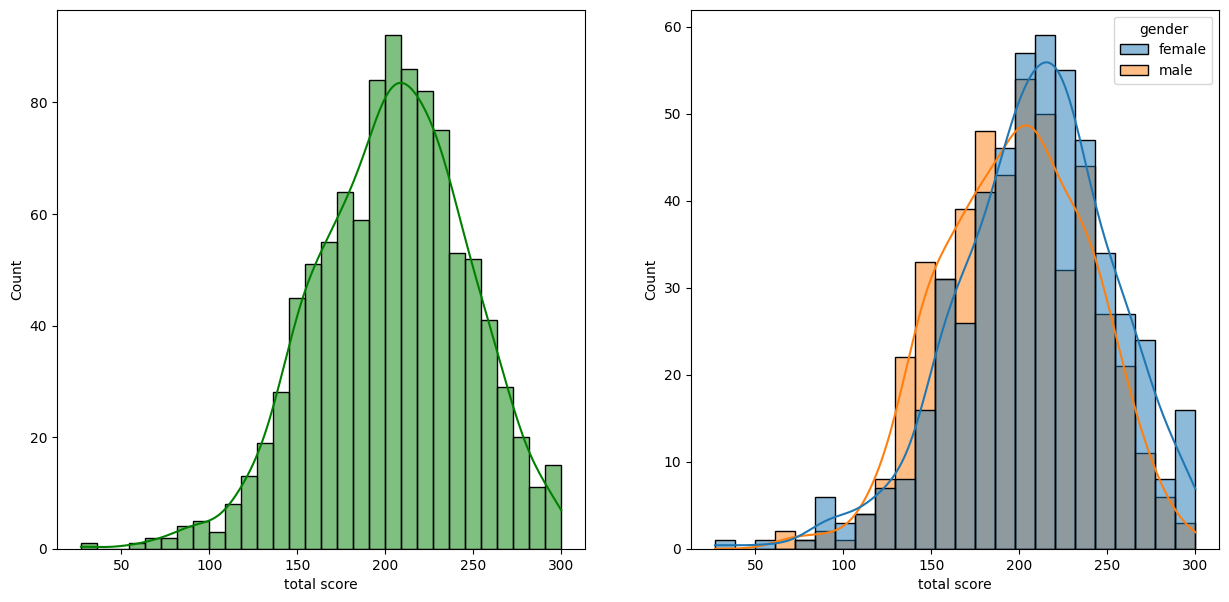

In [23]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data=df, x = 'total score', kde=True, hue = 'gender')
plt.show()

<h4> Insights </h4>

Females tend to perform better than males.

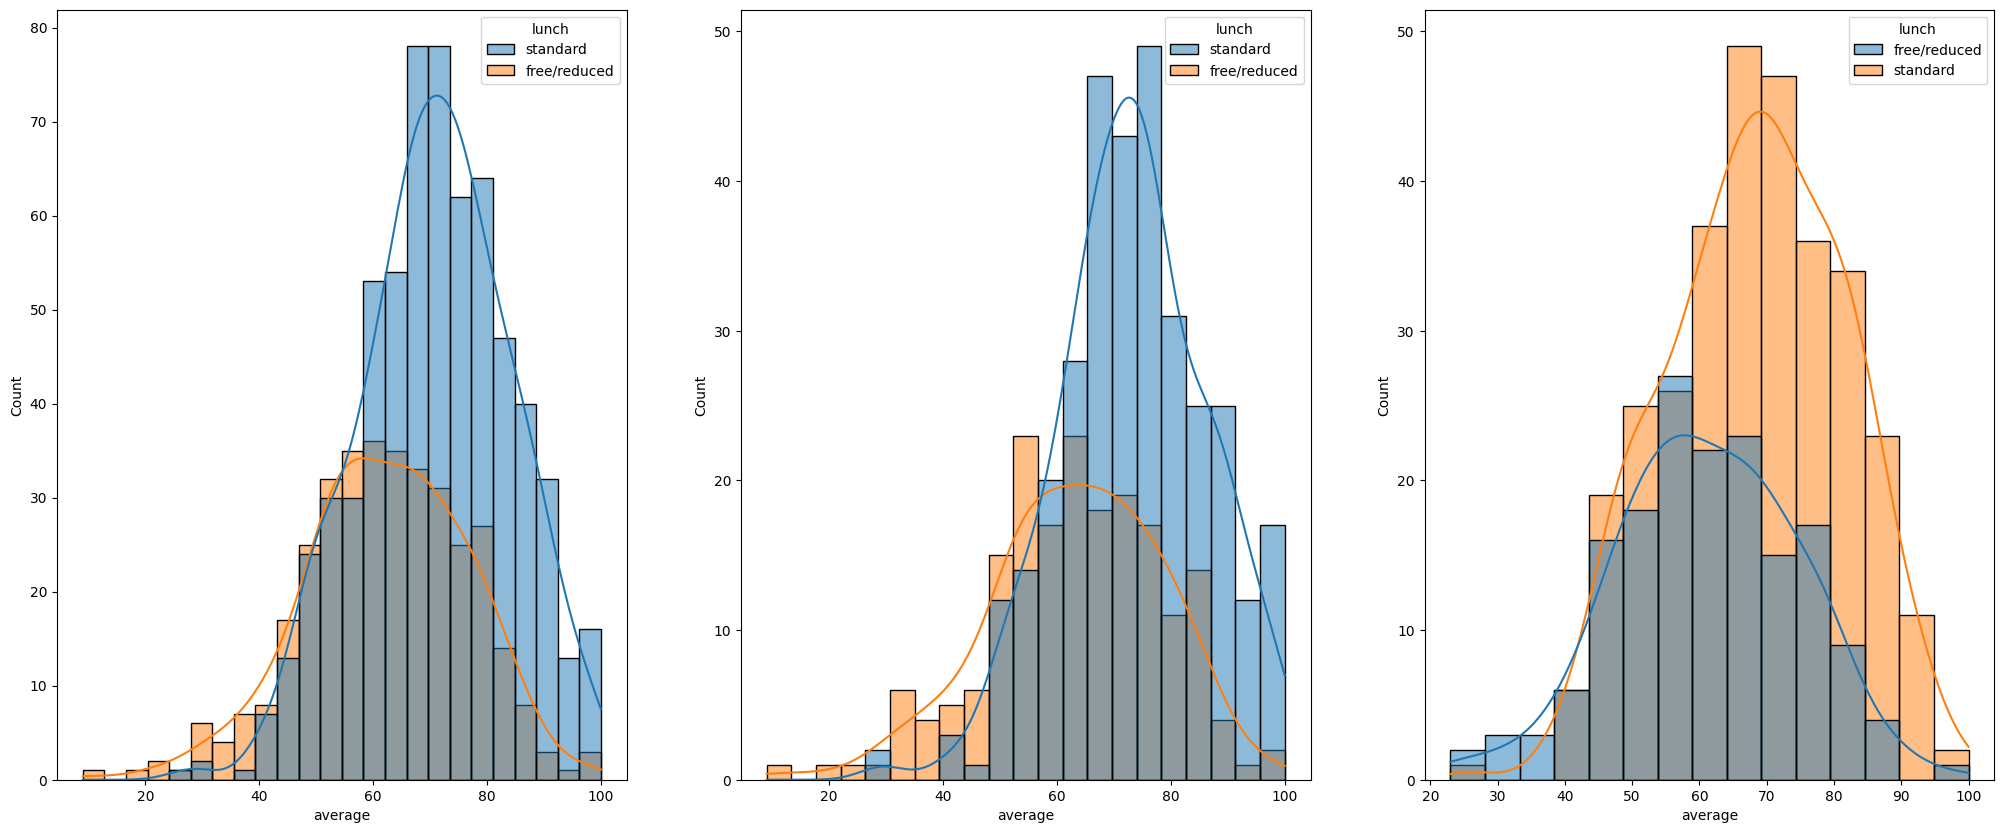

In [32]:
plt.figure(figsize=(25,10))

plt.subplot(1,3,1)
sns.histplot(data=df, x = 'average', kde=True, hue='lunch')

plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x = 'average',hue='lunch', kde=True)

plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True, hue='lunch')
plt.show()

<h4> Insights </h4>

Standard lunch helps to perform well in exams for both genders.


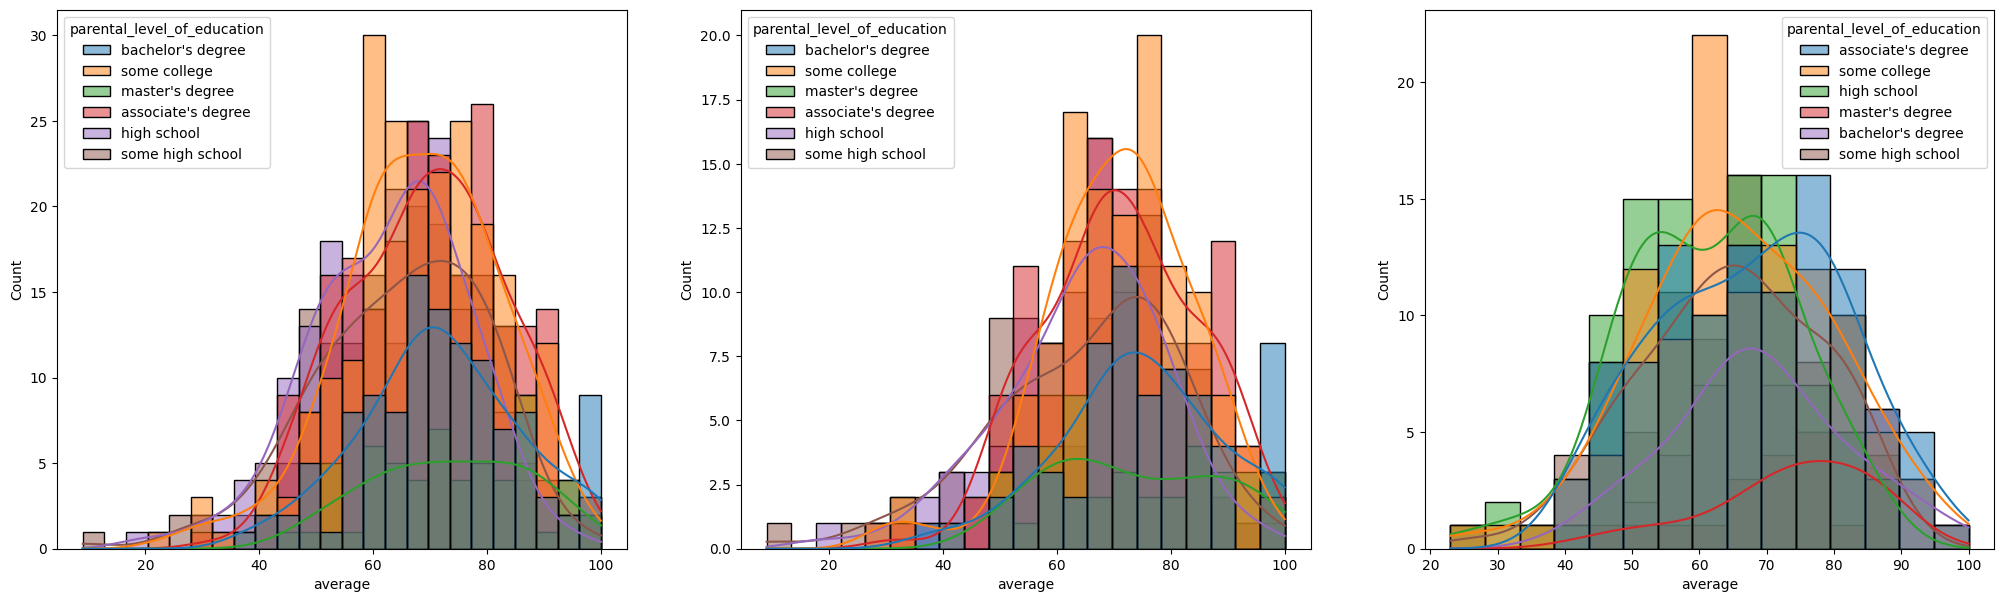

In [35]:
plt.figure(figsize=(25,7))

plt.subplot(1,3,1)
sns.histplot(data = df, x = 'average',hue = 'parental_level_of_education', kde=True)

plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x = 'average',kde=True,hue='parental_level_of_education')

plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x = 'average',kde=True,hue='parental_level_of_education')

plt.show()

<h4> Insights </h4>

1. From 1st plot, we can see that parental level of education does not have a correlation with student performing well in an exam.
2. 2nd plot shows that for Females, some associate degree education done by parents may help them perform well.
3. 3rd plot shows us that for males parents, some college degree may help the student.

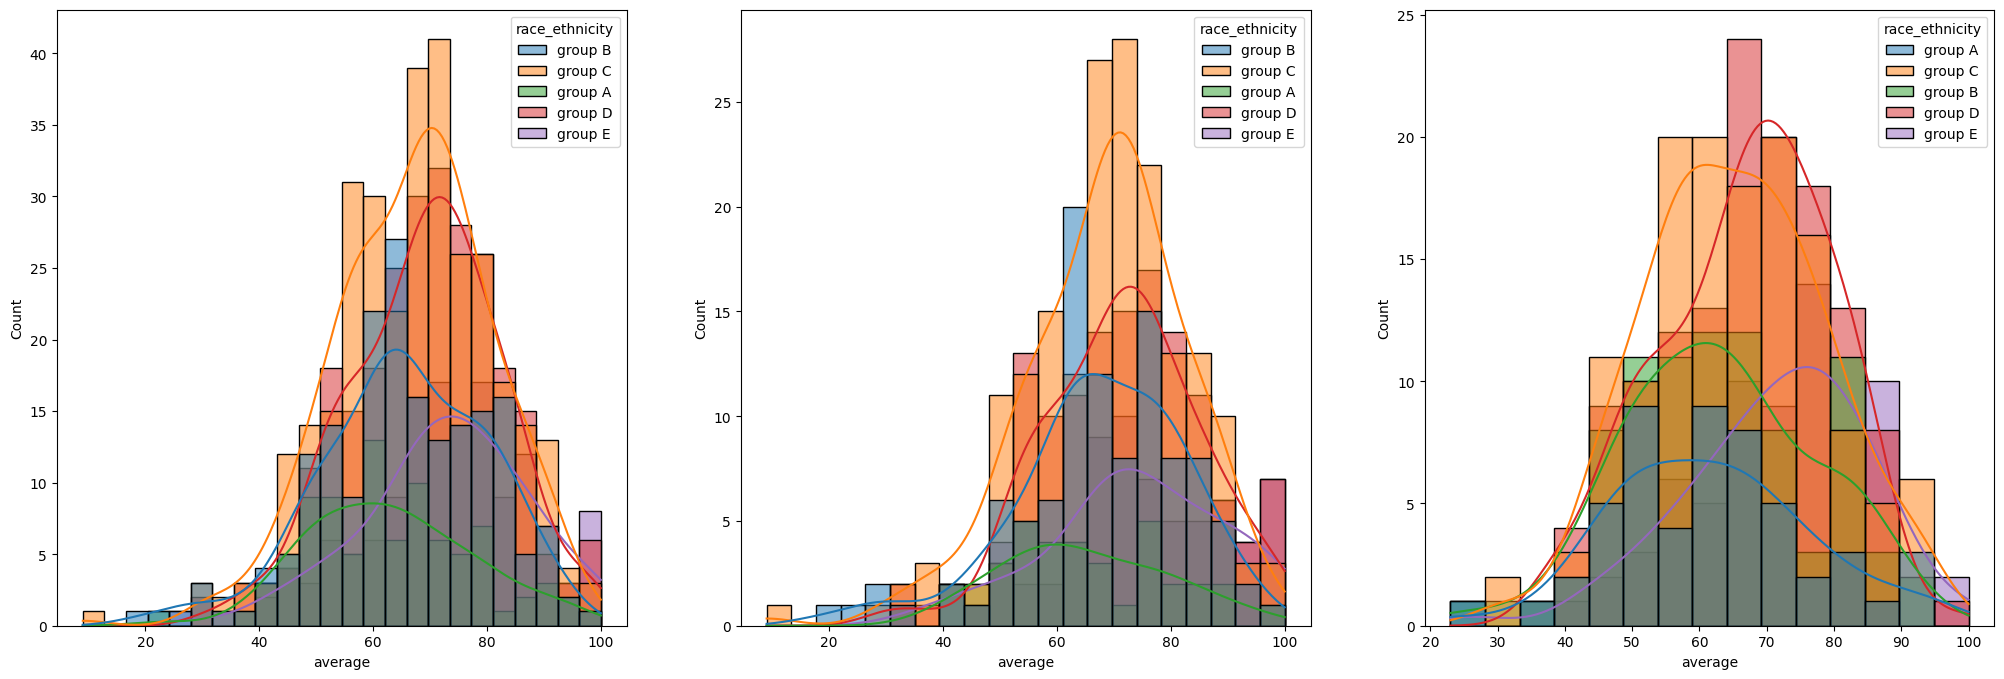

In [37]:
plt.figure(figsize=(25,8))

plt.subplot(1,3,1)
sns.histplot(data=df, x = 'average', kde=True, hue = 'race_ethnicity')

plt.subplot(1,3,2)
sns.histplot(data=df[df.gender == 'female'],x = 'average', kde=True, hue='race_ethnicity')

plt.subplot(1,3,3)
sns.histplot(data=df[df.gender == 'male'],x = 'average', kde=True, hue='race_ethnicity')

plt.show()

<h4> Insights </h4>

1. Group C plays a role in the student getting good exam marks. 
2. Group A & B tend to perform poor in exams.

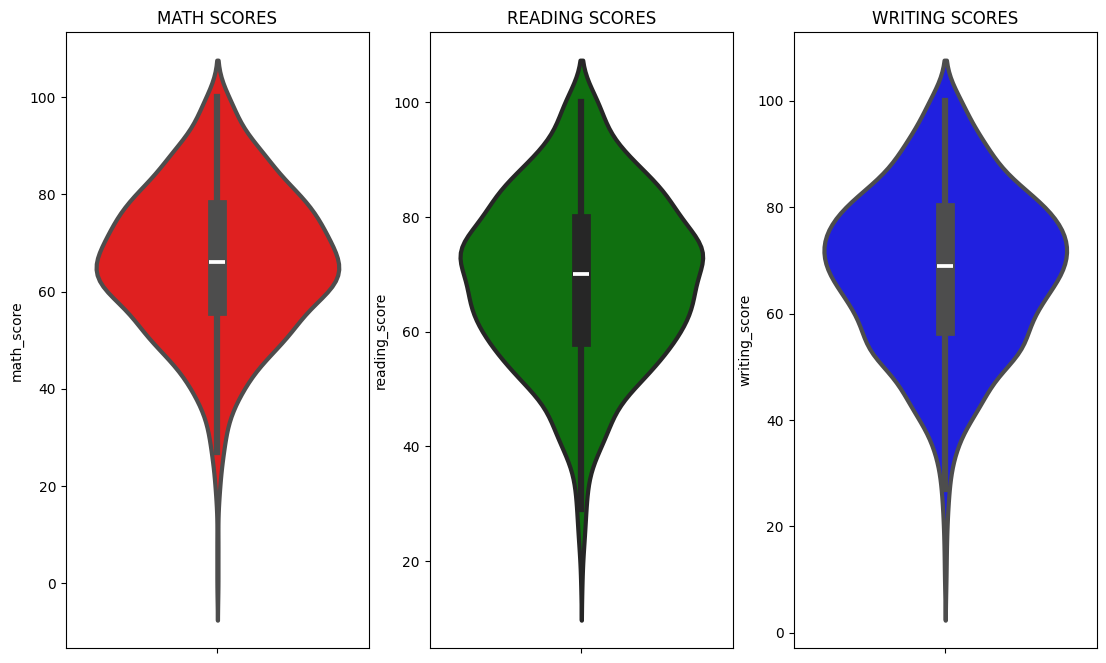

In [39]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

#### Multivariate analysis using pieplot

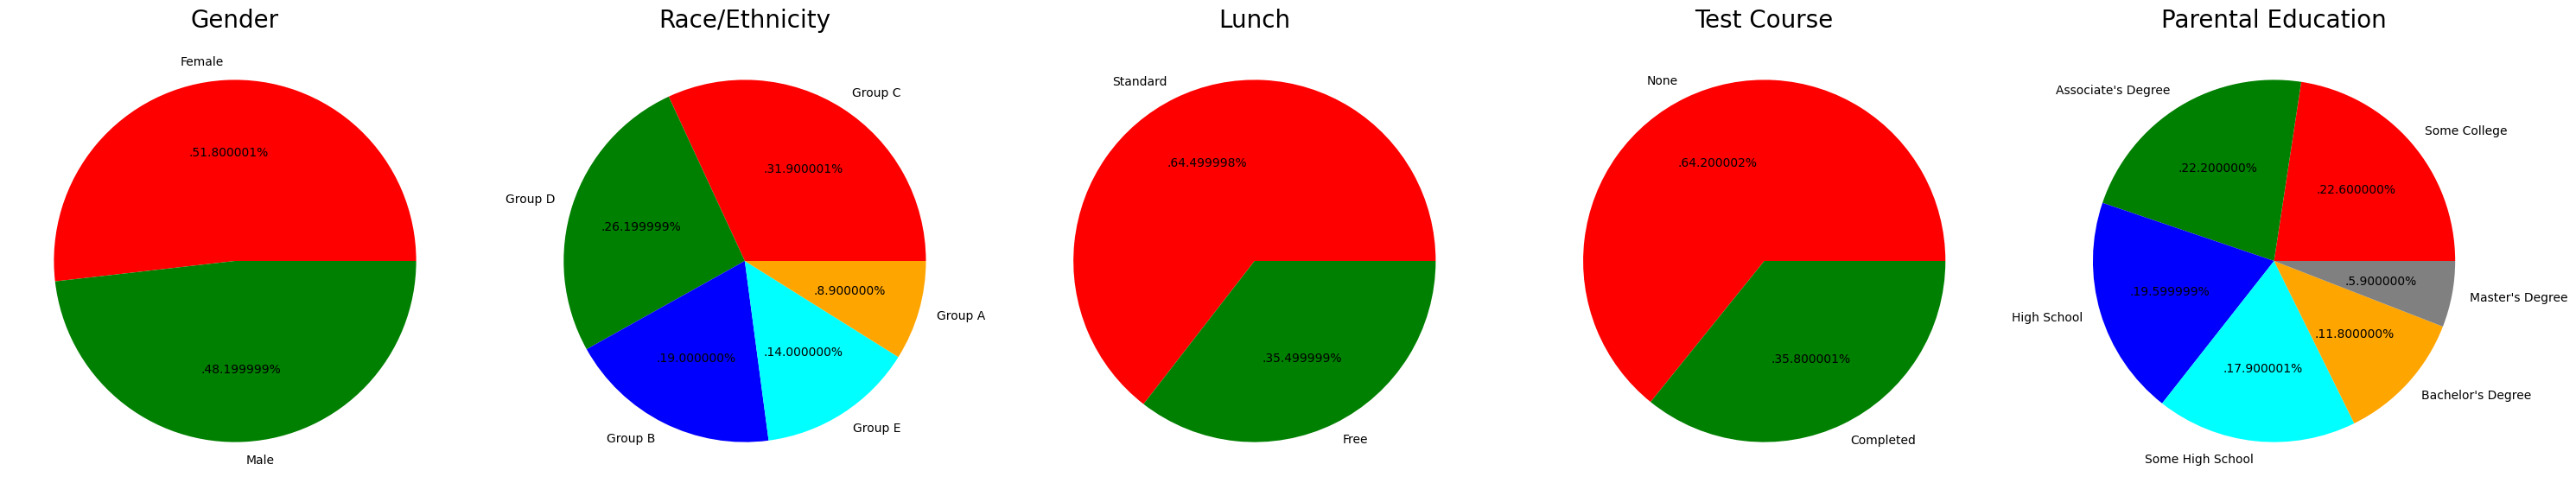

In [41]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

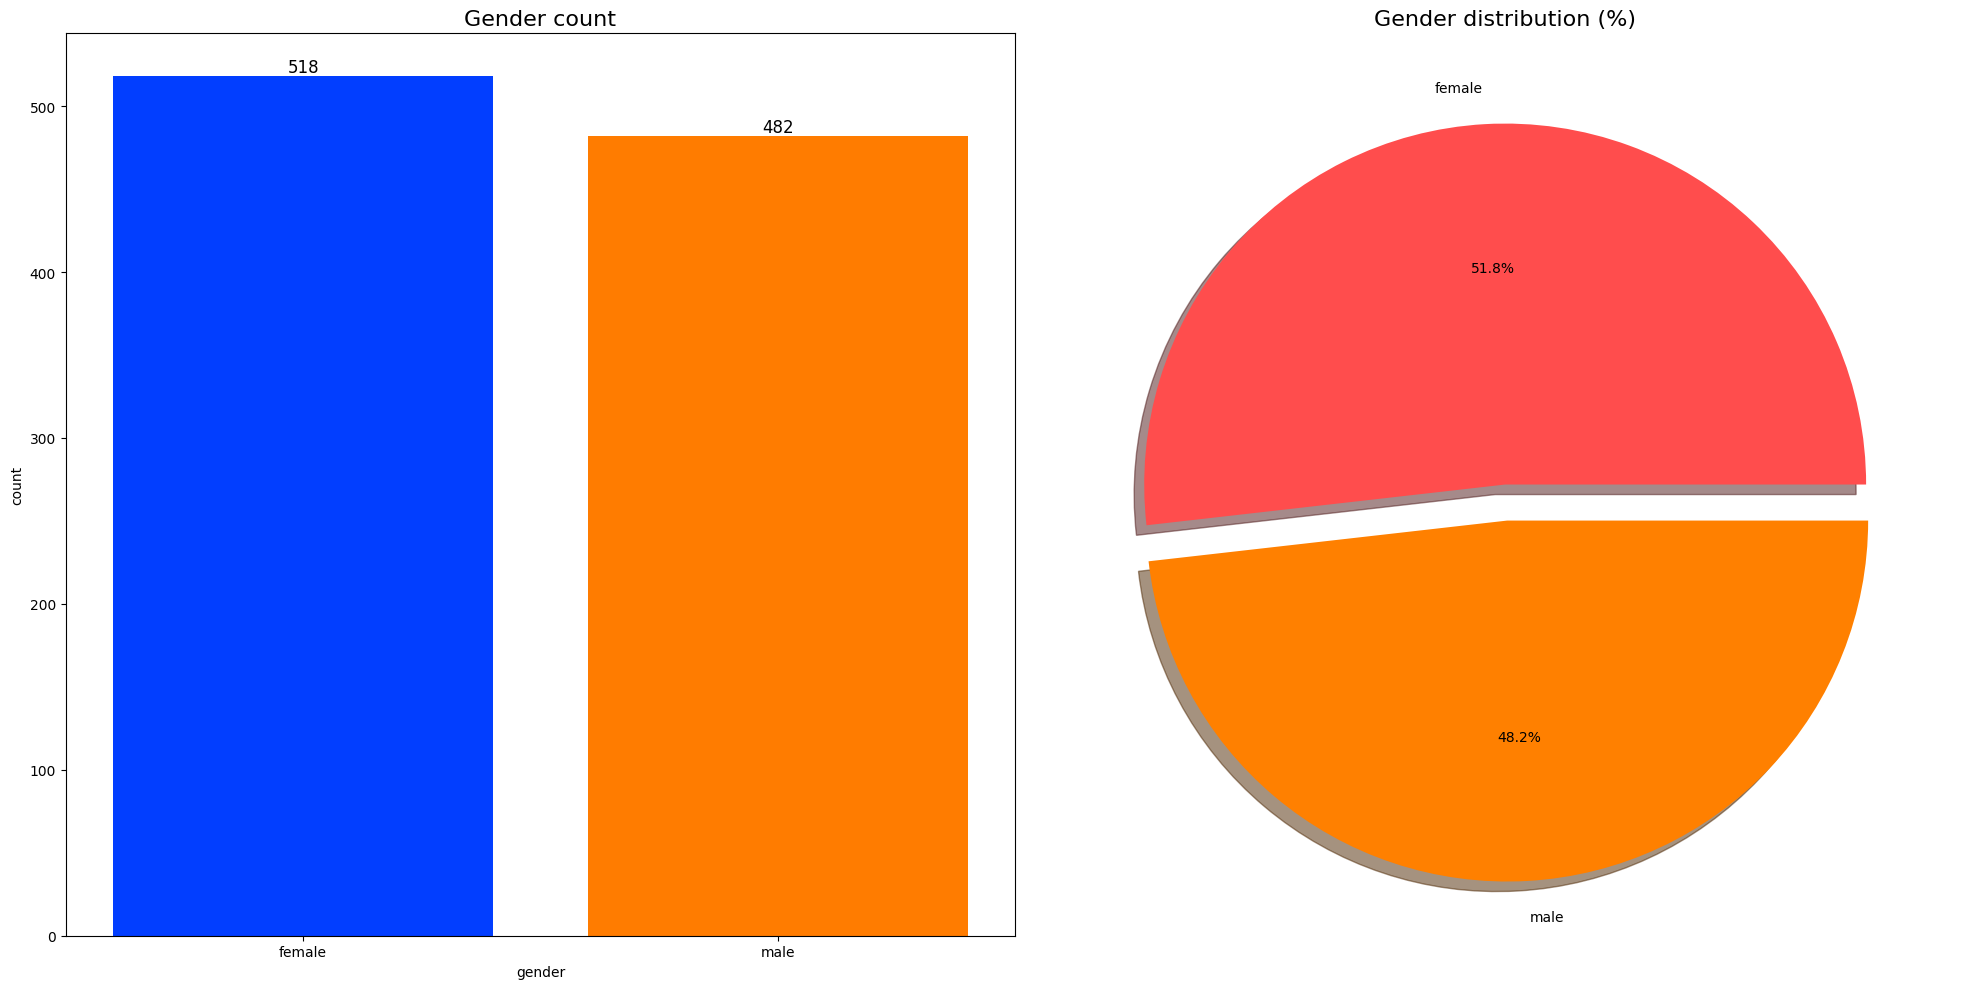

In [47]:
#distribution of gender

f,ax=plt.subplots(1,2,figsize=(20,10))

#bar plot

sns.countplot(x='gender',data=df, palette='bright',ax=ax[0],saturation=1)
ax[0].set_title("Gender count",fontsize = 16)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size = 12)

#pie plot
    
gender_counts = df['gender'].value_counts()
ax[1].pie(gender_counts, labels=gender_counts.index,explode=[0,0.1],autopct = '%1.1f%%', shadow = True, colors=['#ff4d4d', '#ff8000'])

ax[1].set_title("Gender distribution (%)",fontsize=16)

plt.tight_layout()

plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Does gender has any impact on student's performance ? ) 

In [50]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group


,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


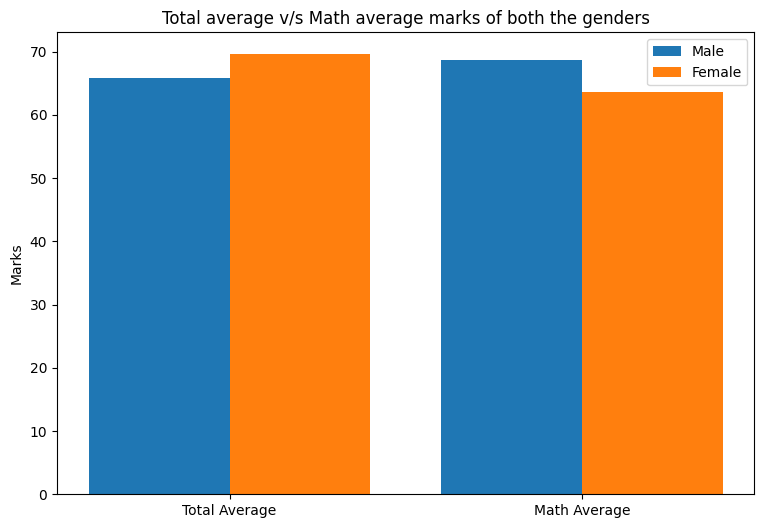

In [56]:
plt.figure(figsize=(9, 6))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders")
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

Univariate analysis for Race/Ethnicity



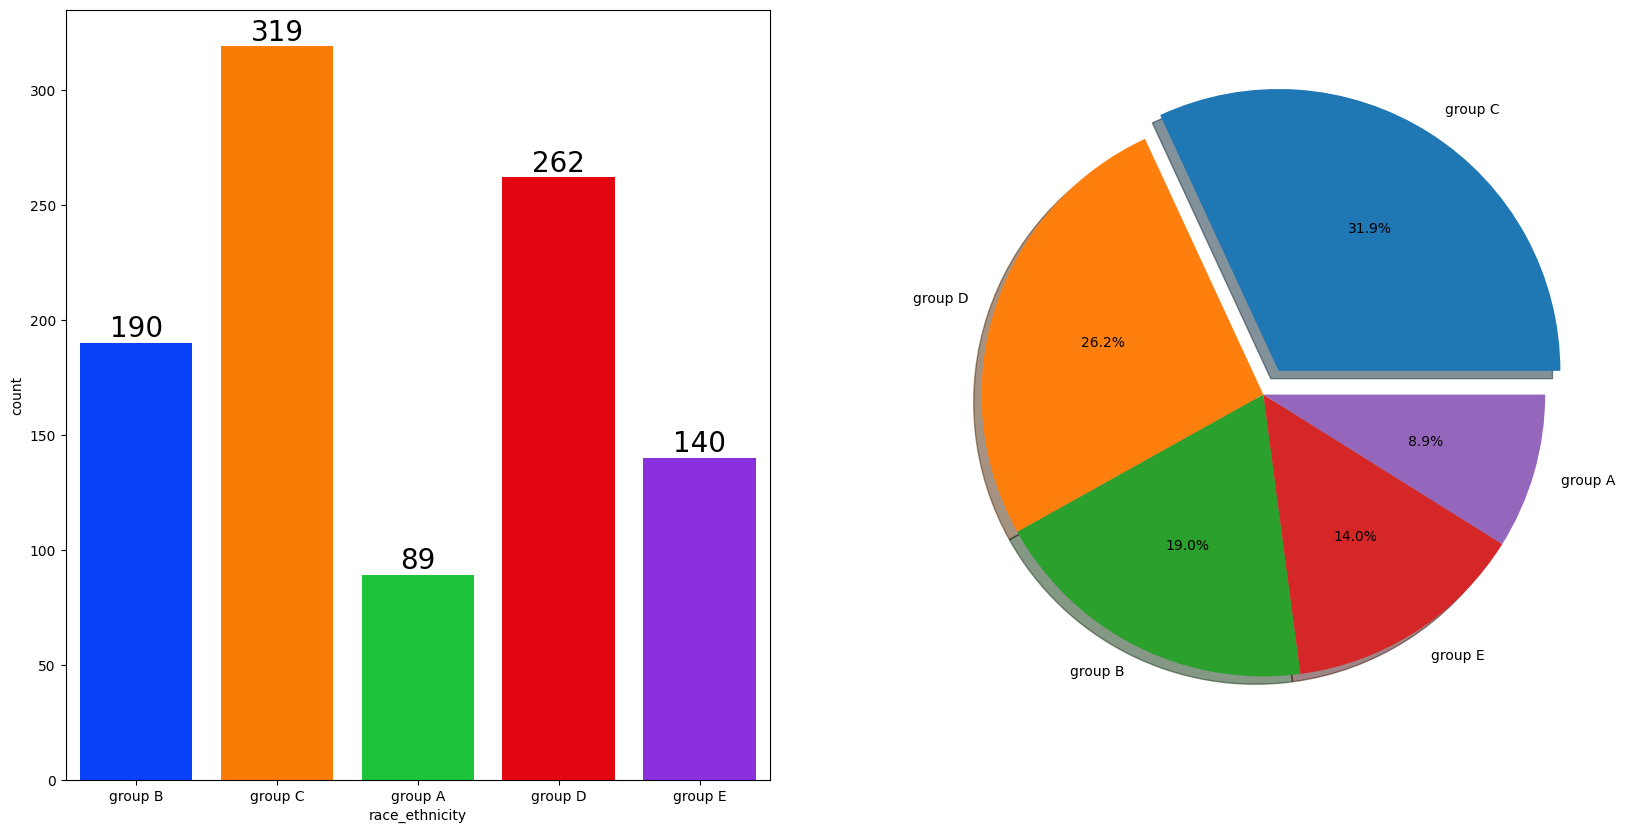

In [57]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Has Race/Ehnicity has any impact on student's performance ? )

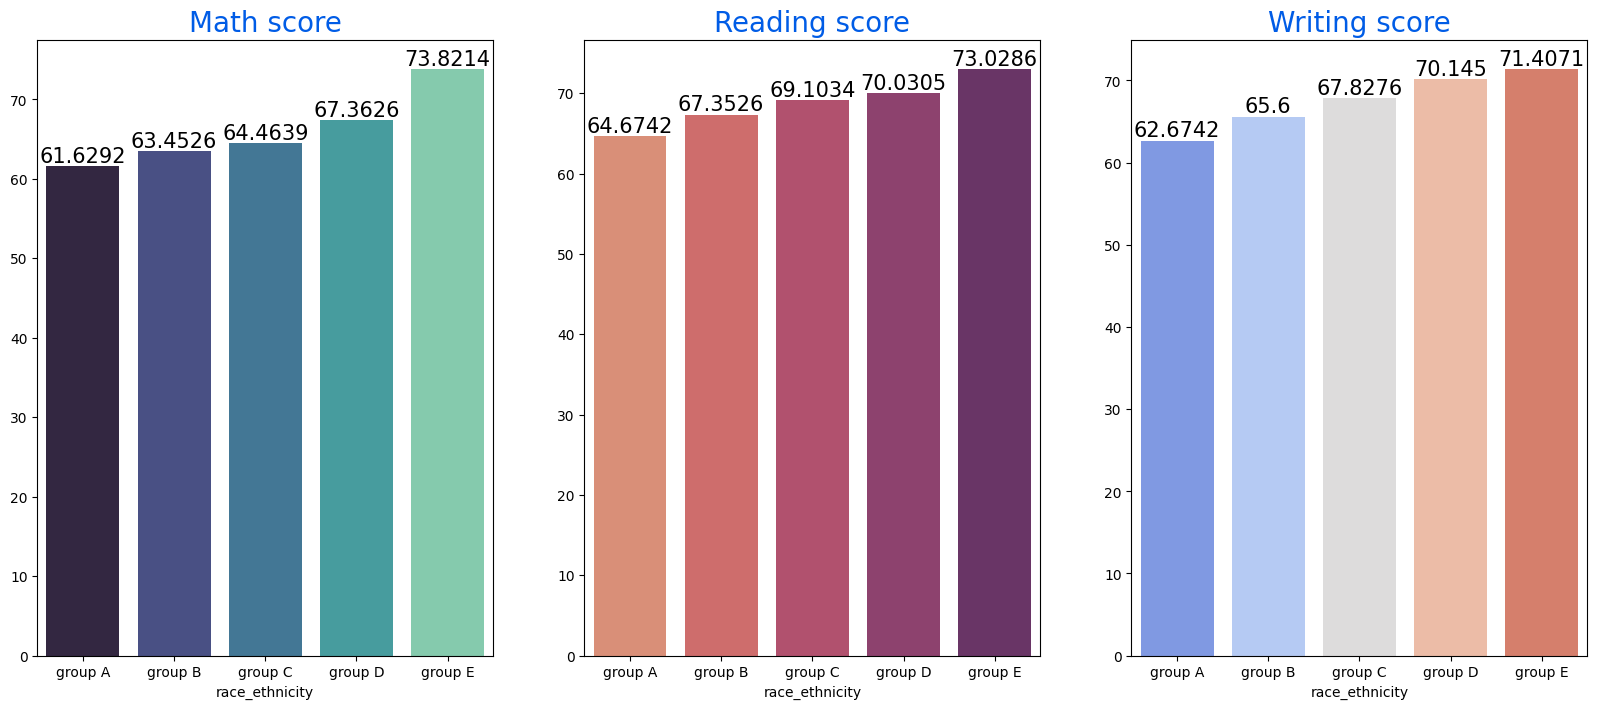

In [59]:
Group_data2=df.groupby('race_ethnicity')

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

<h4> Insights </h4>

- Group E has the highest performance in all subjects. 
- Group A has the lowest performance.

#### PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Does parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

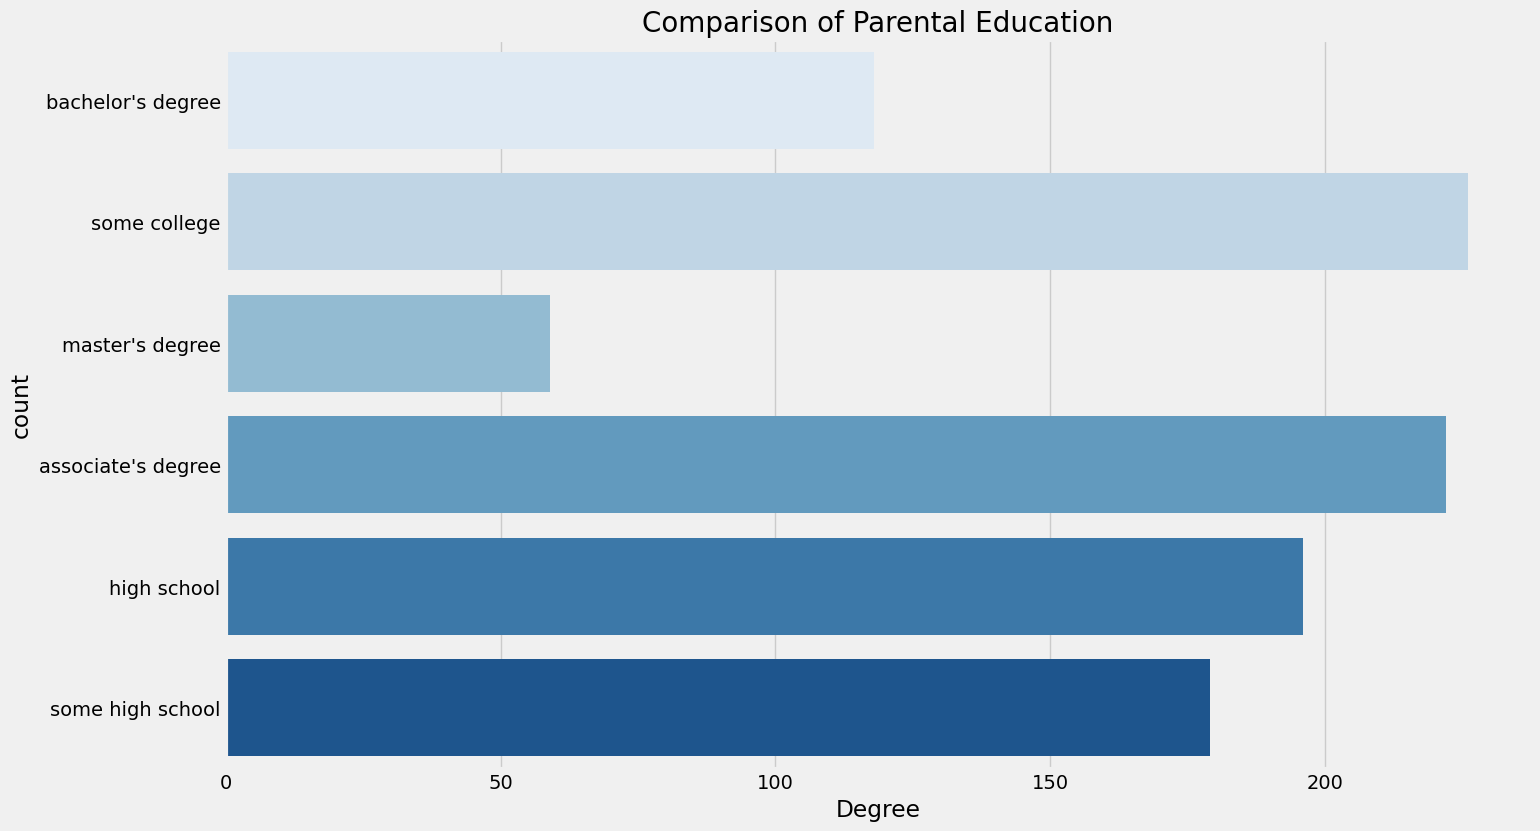

In [60]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

## Bivariate Analysis
-Does parental education has any impact on student's performance ?

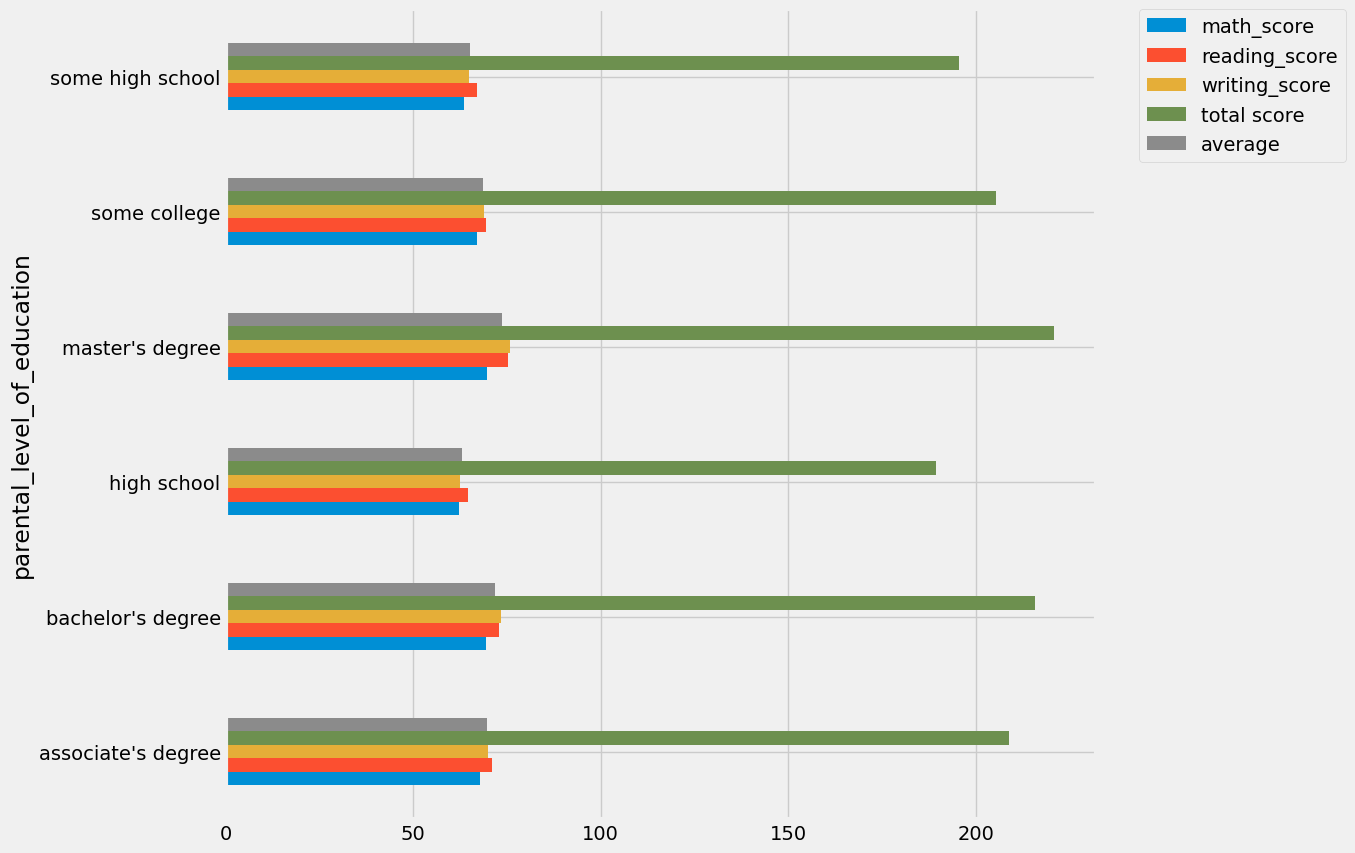

In [66]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Insights
- The parents who have completed Masters degree have their students scoring higher marks.

#### LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

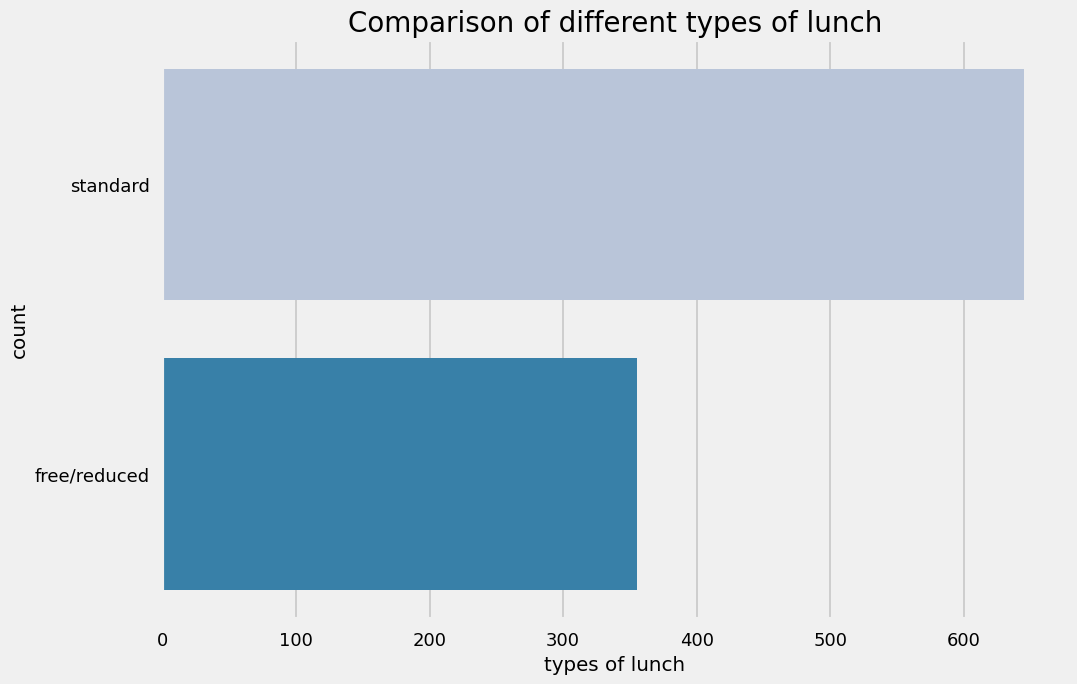

In [67]:
plt.rcParams['figure.figsize']= (15,7)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Does lunch type intake has any impact on student's performance ? )

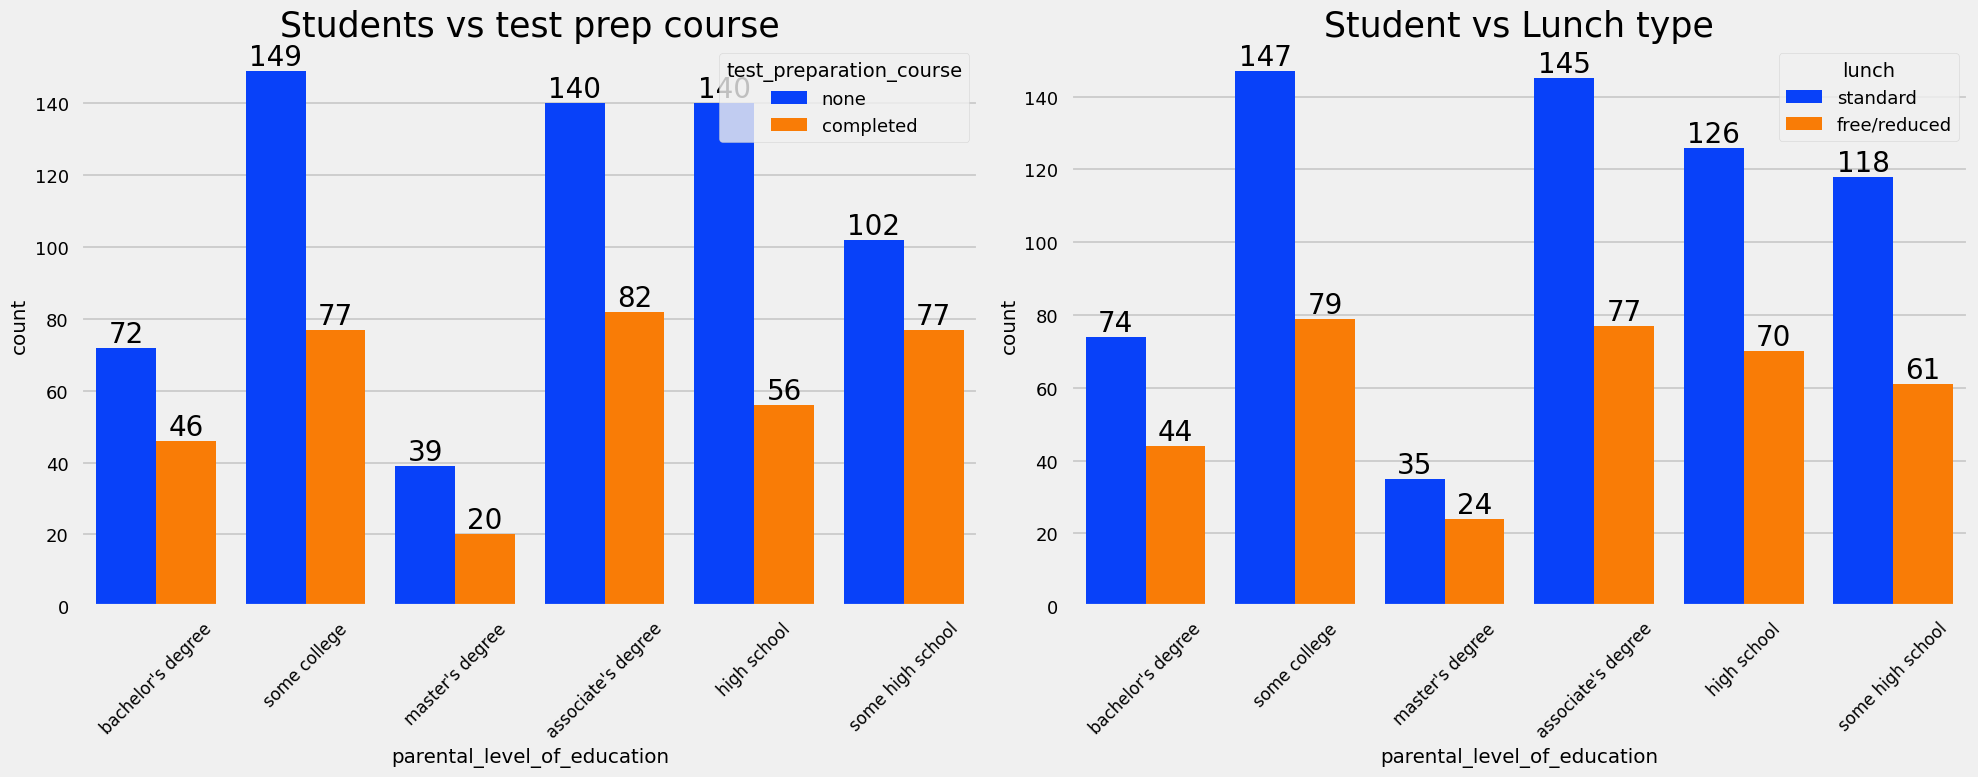

In [74]:
fig, ax = plt.subplots(1,2,figsize=(20,8))


sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='test_preparation_course', saturation = 0.95,ax=ax[0])
ax[0].set_title('Students vs test prep course', color='black', size = 25)
ax[0].tick_params(axis='x', rotation=45, labelsize=12)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size = 20)

#Lunch 
    
sns.countplot(x=df['parental_level_of_education'],data=df, palette='bright',hue='lunch',saturation=0.95,ax = ax[1])
ax[1].set_title('Student vs Lunch type', color='black', size = 25)
ax[1].tick_params(axis='x', rotation=45, labelsize=12)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size = 20)
    

plt.tight_layout()
plt.show()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

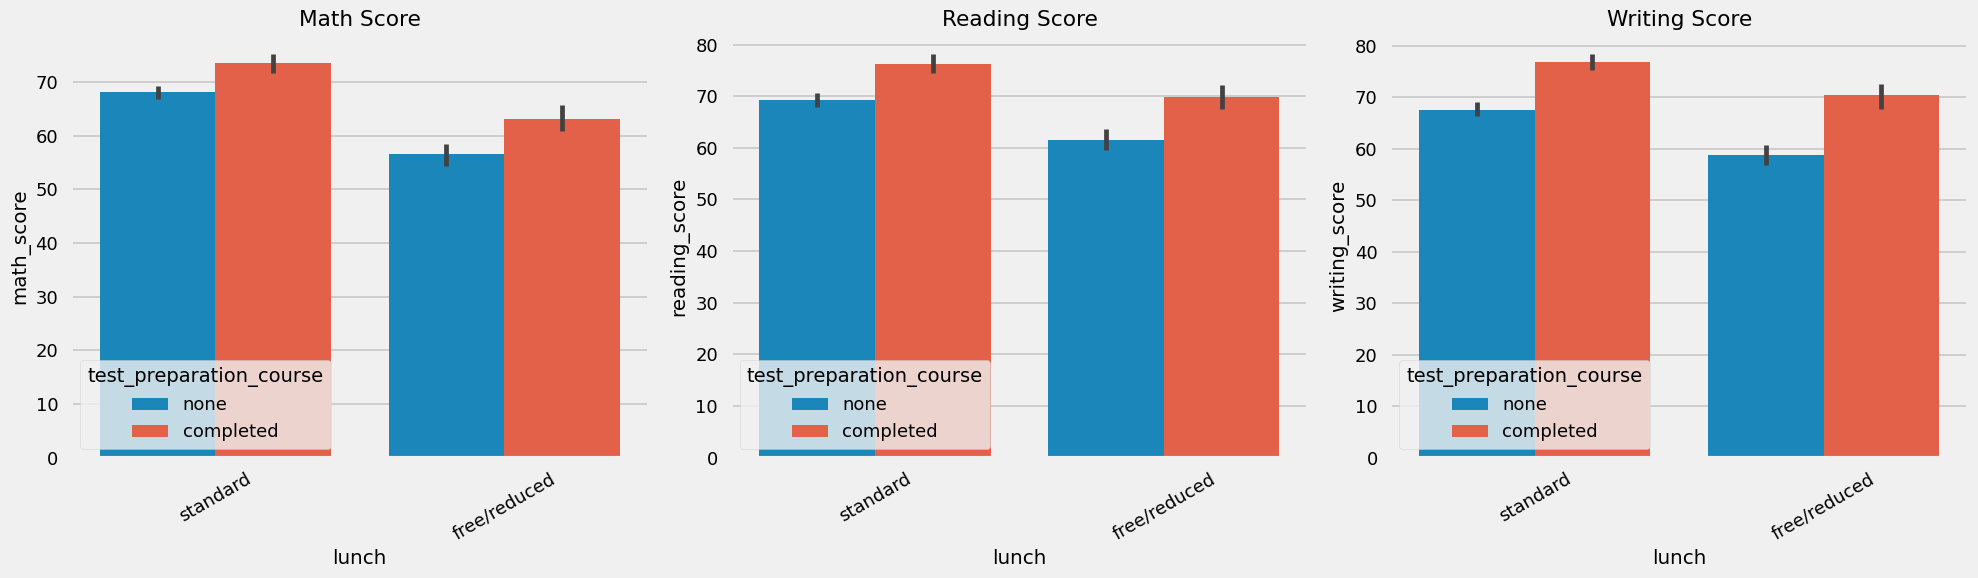

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 plots

sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df, ax=ax[0])
ax[0].set_title('Math Score')

sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df, ax=ax[1])
ax[1].set_title('Reading Score')

sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df, ax=ax[2])
ax[2].set_title('Writing Score')

# Optional: rotate x labels for clarity
for a in ax:
    a.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### CHECKING OUTLIERS

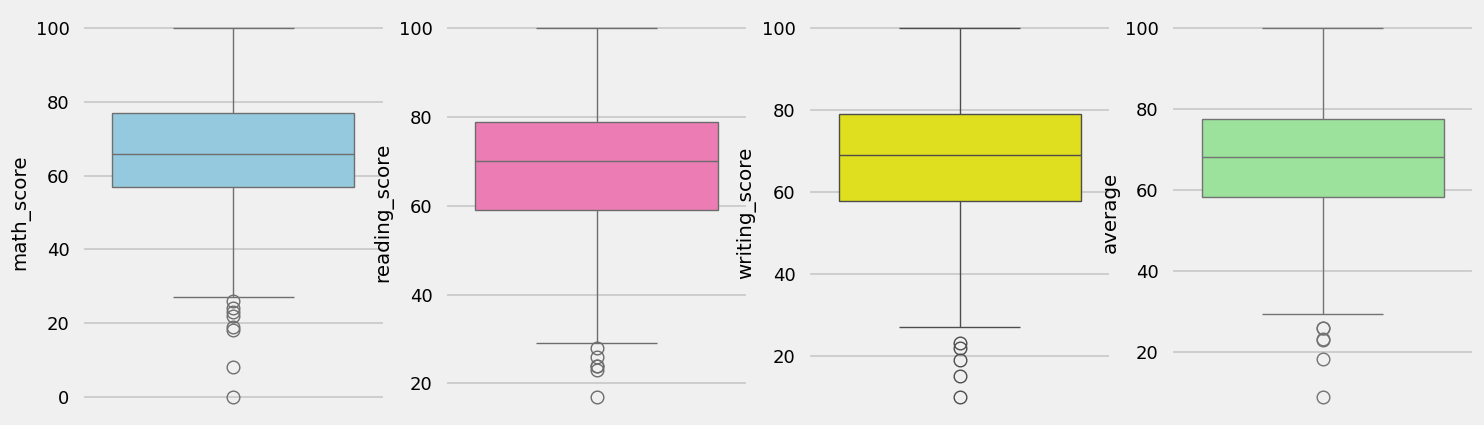

In [79]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

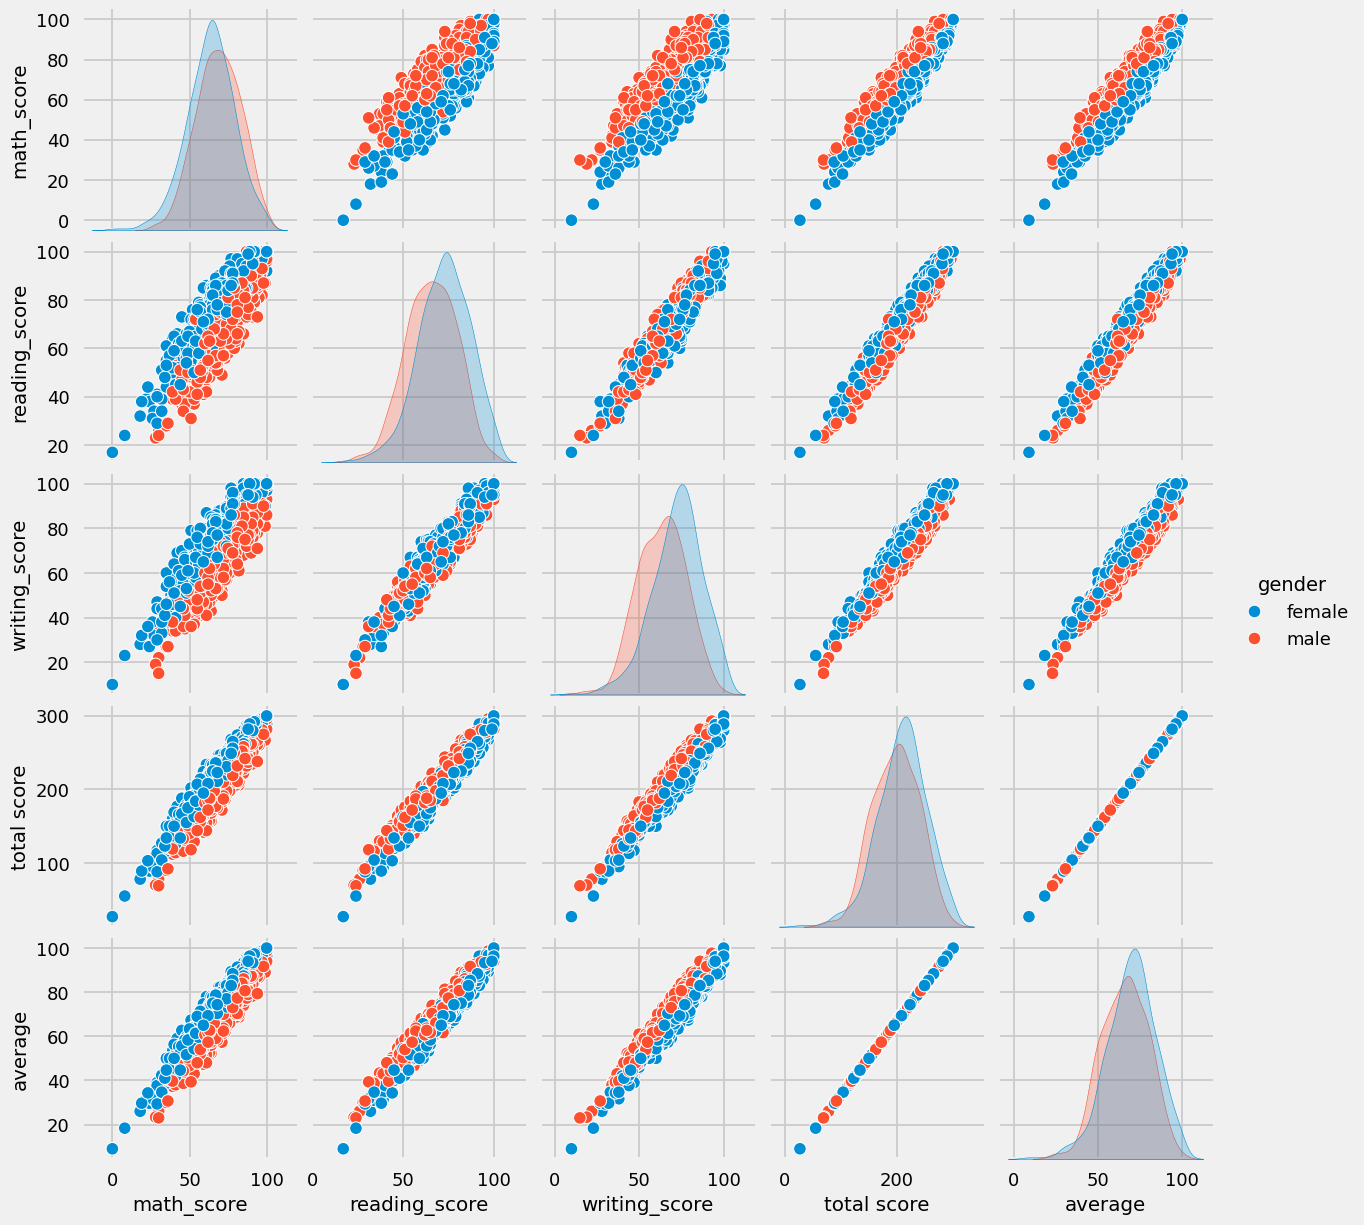

In [80]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

Model training

In [86]:
!pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 6.9 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 7.4 MB/s eta 0:00:00a 0:00:01
